In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

In [2]:
# para definir o local, assim mostrar o tempo conforme padrão no local
import locale
locale.setlocale(locale.LC_ALL,"pt_BR")#windows

'pt_BR'

In [3]:
#funcão para plotar os gráficos com melhor visualização

def plot_graf(data_graf,title="title",xlabel="x label",ylabel=" y label",rotate=False):
    """ 
    usage plot_grat(dataset,title)
    title: title of grafic
    xlabel: label of x
    ylabel: label of y 
    """
    plt.figure(figsize=(10,5),dpi=300)
    plt.bar(range(1,len(data_graf)+1),data_graf)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # mostra os valores das barras
    for index_plot,data_plot in enumerate(data_graf):
        if data_plot<1000:
            plt.text(x=index_plot+0.8 , y =data_plot+1.5 , s=f"{data_plot}" , fontdict=dict(fontsize=9))
        else:
            plt.text(x=index_plot+0.5 , y =data_plot+1.5 , s=f"{data_plot}" , fontdict=dict(fontsize=9))
    if rotate:
        plt.autofmt_xdate(0) # formata as datas, rotacionando-os
    plt.title(title)
    plt.show()
    return

In [4]:
data=pd.read_csv("OMS-covid.csv")

In [5]:
data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24T00:00:00Z,AF,Afghanistan,EMRO,1,1,0,0
1,2020-02-25T00:00:00Z,AF,Afghanistan,EMRO,0,1,0,0
2,2020-02-26T00:00:00Z,AF,Afghanistan,EMRO,0,1,0,0
3,2020-02-27T00:00:00Z,AF,Afghanistan,EMRO,0,1,0,0
4,2020-02-28T00:00:00Z,AF,Afghanistan,EMRO,0,1,0,0


In [6]:
data.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [7]:
# carregando os dados do Brasil
data_brasil=data.loc[data["Country"]=="Brazil"]

In [8]:
br_index=np.arange(0,len(data_brasil))
data_brasil.set_index(br_index,inplace=True)

In [9]:
data_brasil.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-26T00:00:00Z,BR,Brazil,AMRO,1,1,0,0
1,2020-02-27T00:00:00Z,BR,Brazil,AMRO,0,1,0,0
2,2020-02-28T00:00:00Z,BR,Brazil,AMRO,0,1,0,0
3,2020-02-29T00:00:00Z,BR,Brazil,AMRO,0,1,0,0
4,2020-03-01T00:00:00Z,BR,Brazil,AMRO,1,2,0,0


## Pré-Processando o tempo(dias $\rightarrow$ semanas)

In [10]:
# números de semanas desde o primeiro caso
mounth=pd.to_datetime(data_brasil["Date_reported"],format="%Y-%m-%dT%H:%M:%SZ")
# date.weekday(): Return the day of the week as an integer, where Monday is 0 and Sunday is 6
d_sem=mounth.dt.weekday
semanas=len([x for x in d_sem if x==5])

In [11]:
mes=list(mounth.astype(str))

In [12]:
# identificandos os sábados para definir o número de semanas
idx_semana=[]
for i in range(len(d_sem)):
    if d_sem[i]==5:
        idx_semana.append(i)

In [13]:
sem=1
data_brasil["Semana_ep"]=0
for idx,_ in data_brasil.iterrows():
    if d_sem[idx]==6:
        data_brasil["Semana_ep"].at[idx]=sem
        sem+=1
    else:
        data_brasil["Semana_ep"].at[idx]=sem
data_brasil.head()

C:\Users\Matheus Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Semana_ep
0,2020-02-26T00:00:00Z,BR,Brazil,AMRO,1,1,0,0,1
1,2020-02-27T00:00:00Z,BR,Brazil,AMRO,0,1,0,0,1
2,2020-02-28T00:00:00Z,BR,Brazil,AMRO,0,1,0,0,1
3,2020-02-29T00:00:00Z,BR,Brazil,AMRO,0,1,0,0,1
4,2020-03-01T00:00:00Z,BR,Brazil,AMRO,1,2,0,0,1


In [14]:
data_brasil.groupby("Semana_ep").sum()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Semana_ep,,,,
1,2,6,0,0
2,17,60,0,0
3,102,476,0,0
4,783,3582,11,31
5,2513,16504,81,386
6,5639,42258,267,1509
7,10582,100603,697,4935
8,14044,184015,1085,11008
9,19313,307157,1529,20014


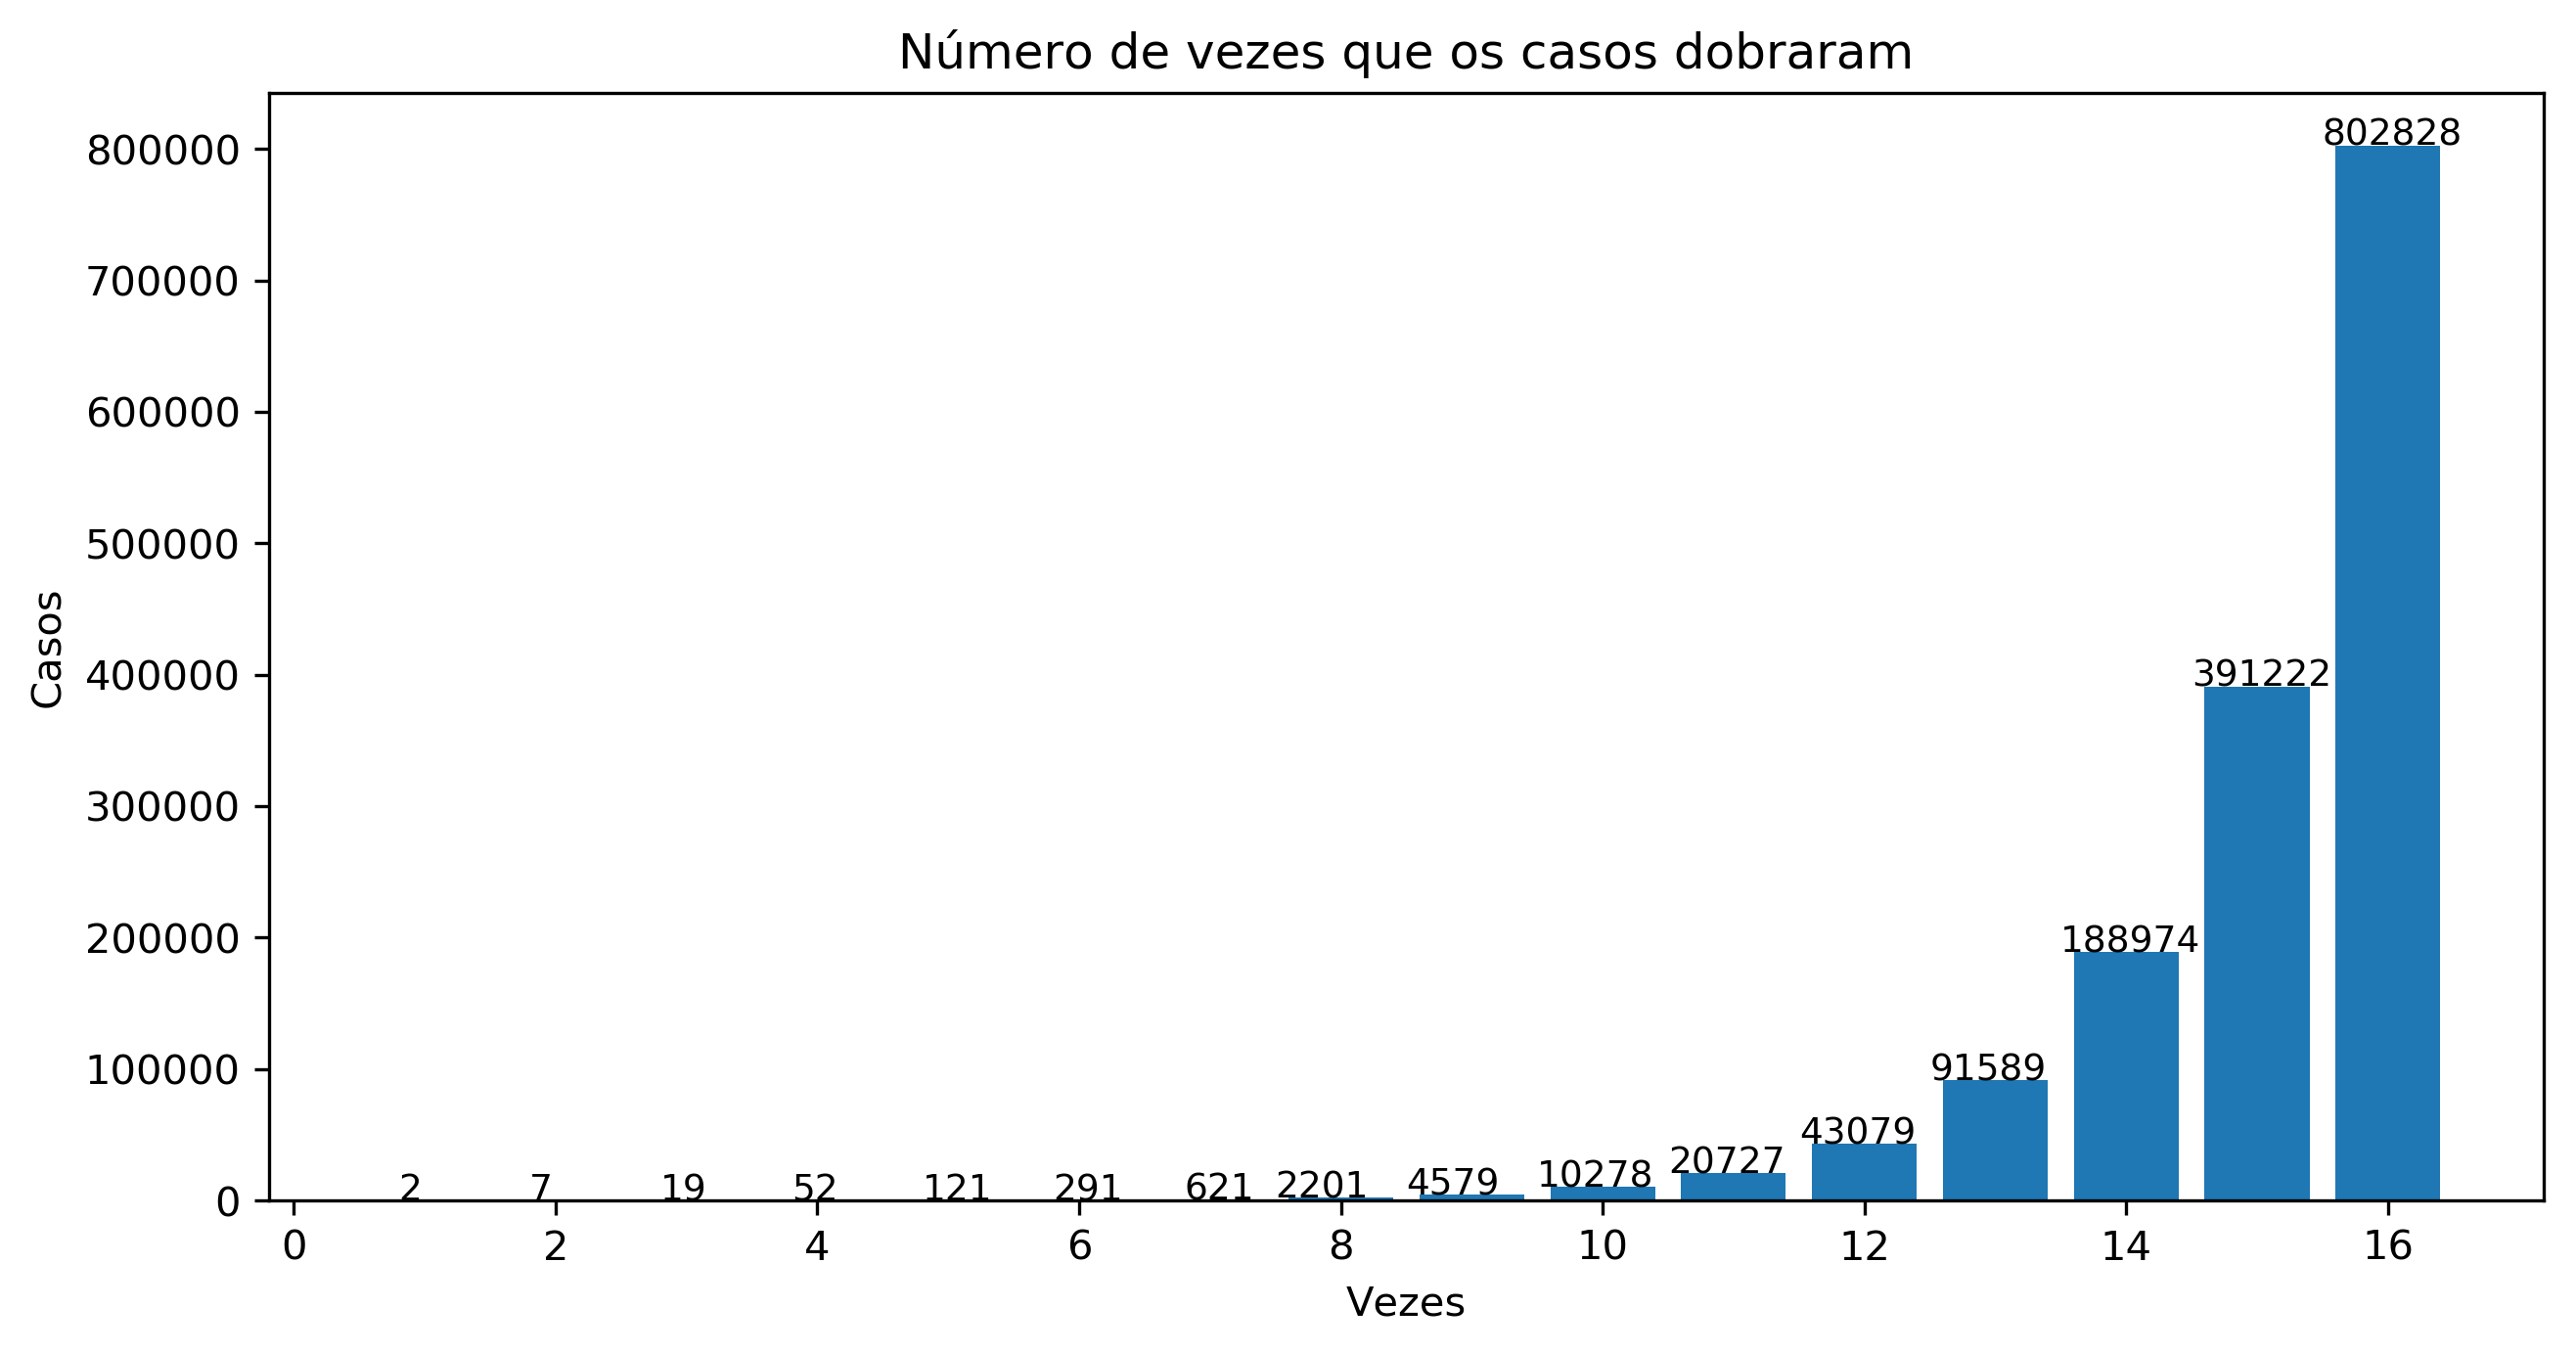

In [15]:
# plotar o número de vezes que os casos dobraram
datas=[]
casos=[]
com=data_brasil["Cumulative_cases"].at[0]
for idx,_ in data_brasil.iterrows():
    sum1=data_brasil["Cumulative_cases"].at[idx]
    if sum1>=2*com:
        datas.append(mes[idx])
        casos.append(data_brasil["Cumulative_cases"].at[idx])
        com=data_brasil["Cumulative_cases"].at[idx]
        
plot_graf(casos,"Número de vezes que os casos dobraram","Vezes","Casos")

## Casos Acumulados

In [16]:
# Identificando os acumulados semanais
casos_semana=[data_brasil["Cumulative_cases"][x] for x in idx_semana]

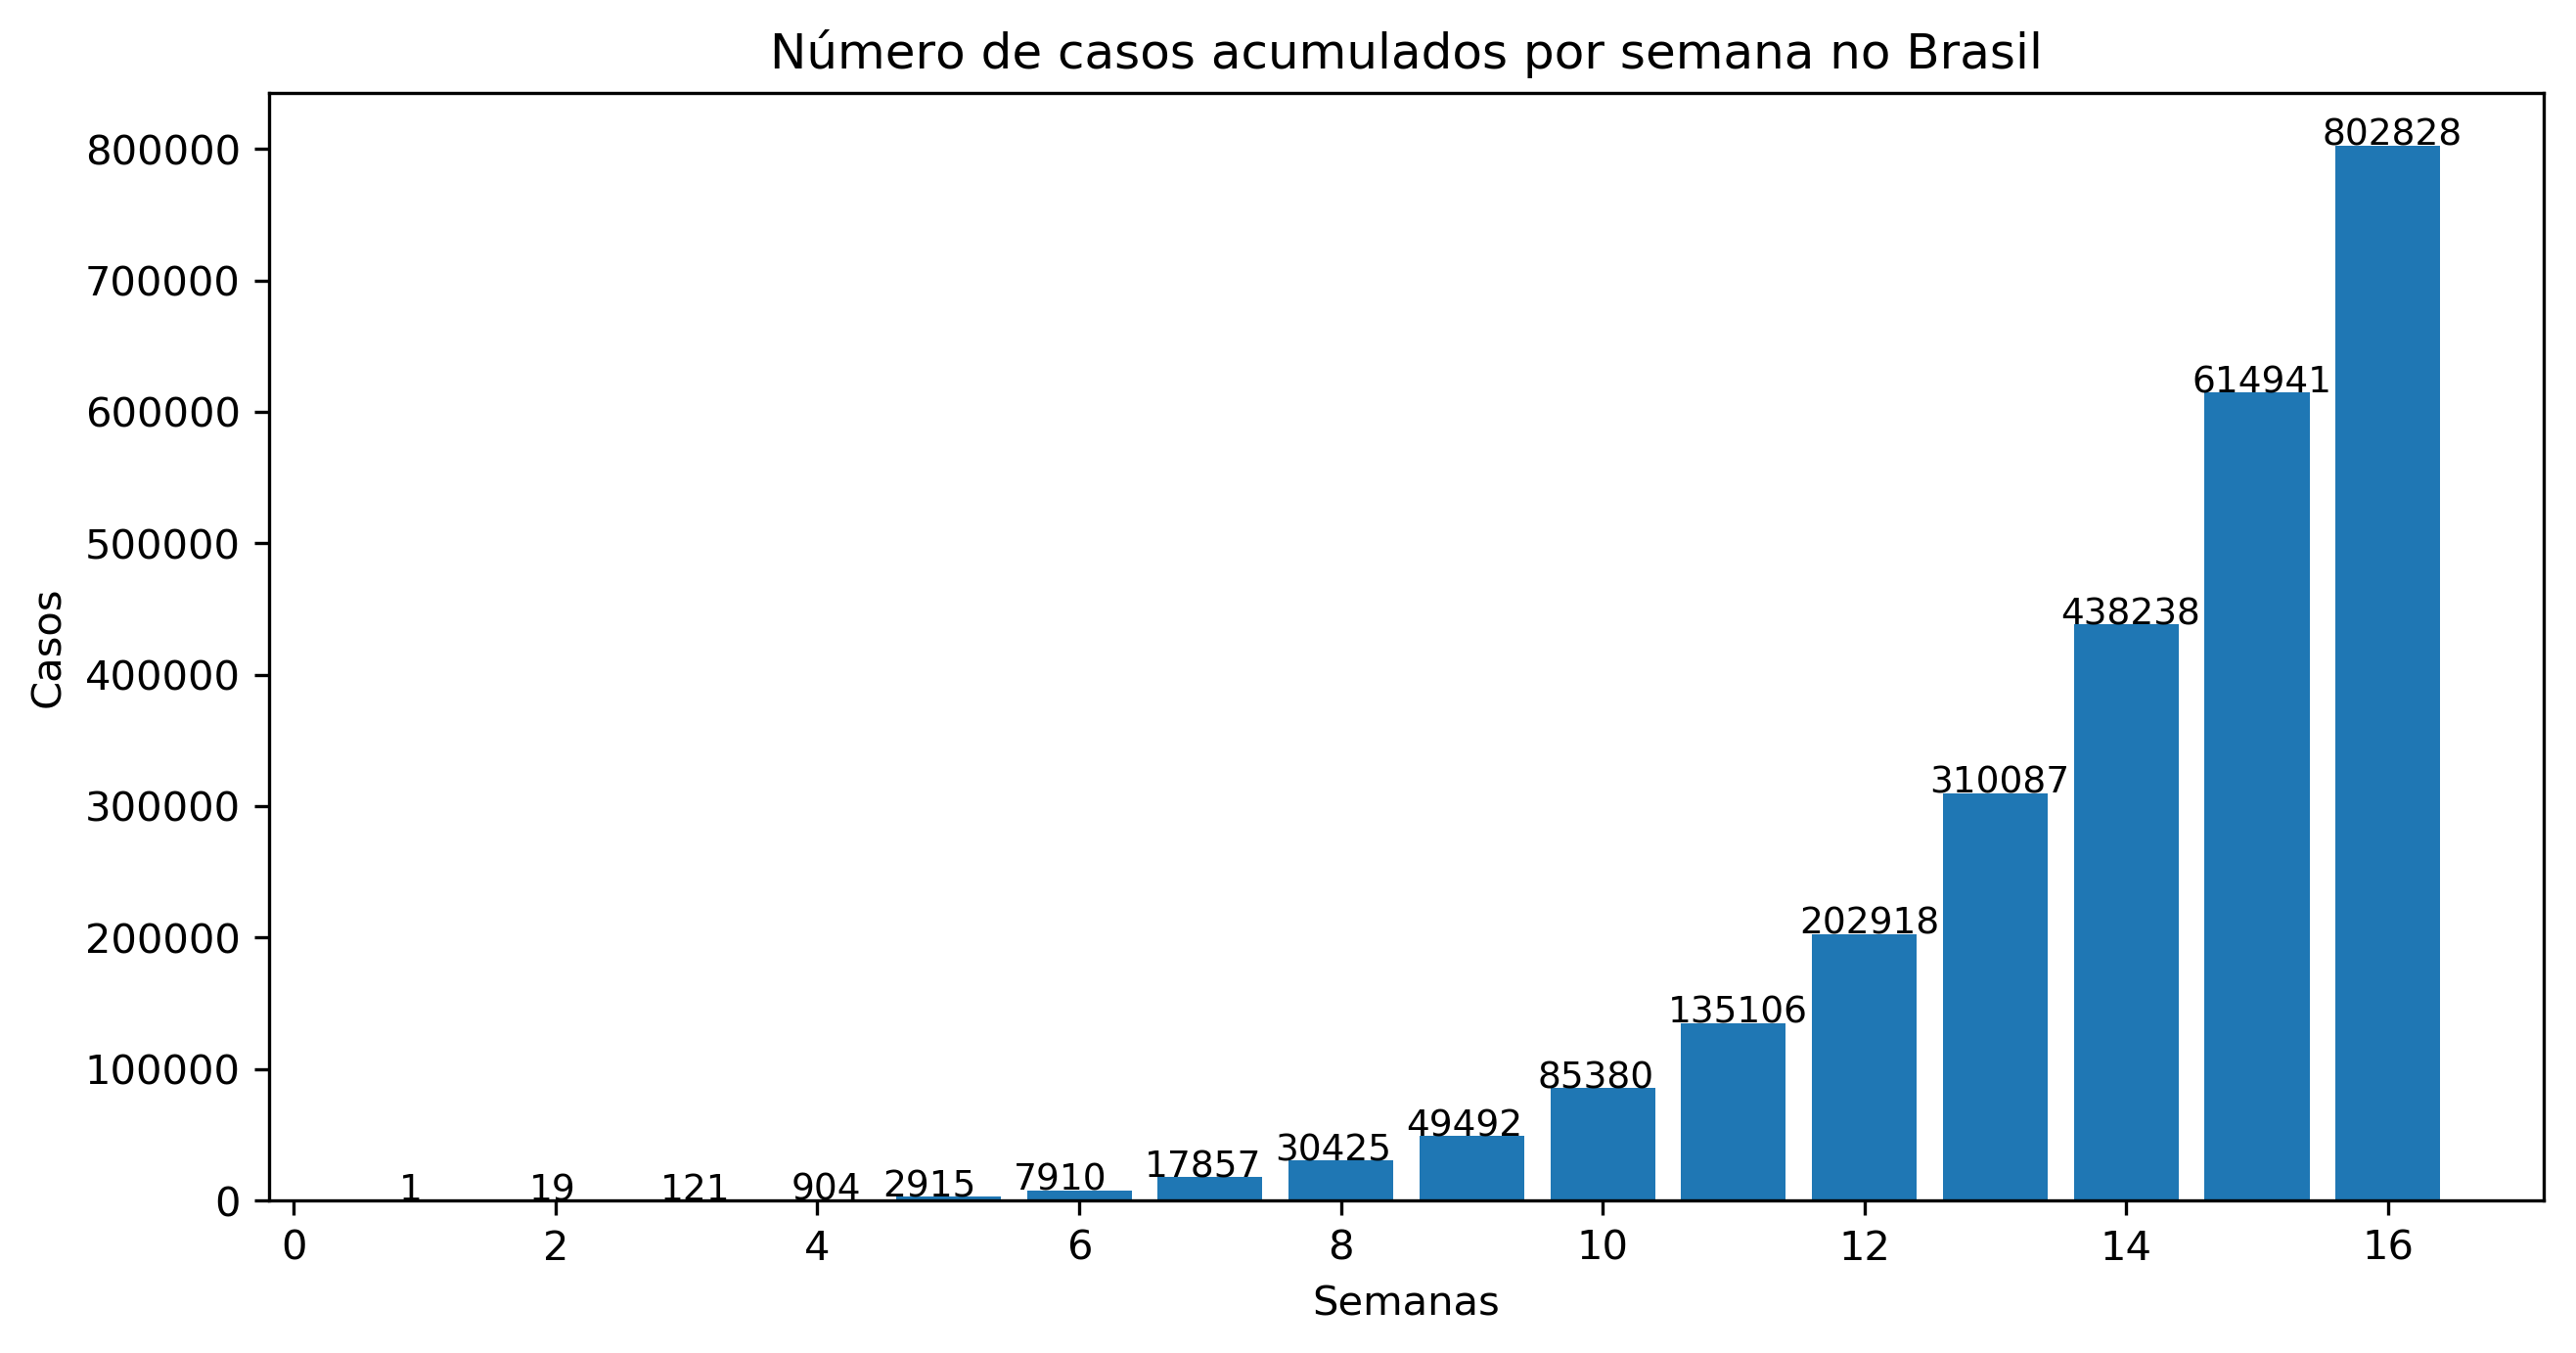

In [17]:
plot_graf(casos_semana,"Número de casos acumulados por semana no Brasil","Semanas","Casos")

## Novos Casos

In [18]:
# Identificando os novos casos por semana
novos_cs =data_brasil.groupby("Semana_ep").sum()["New_cases"]

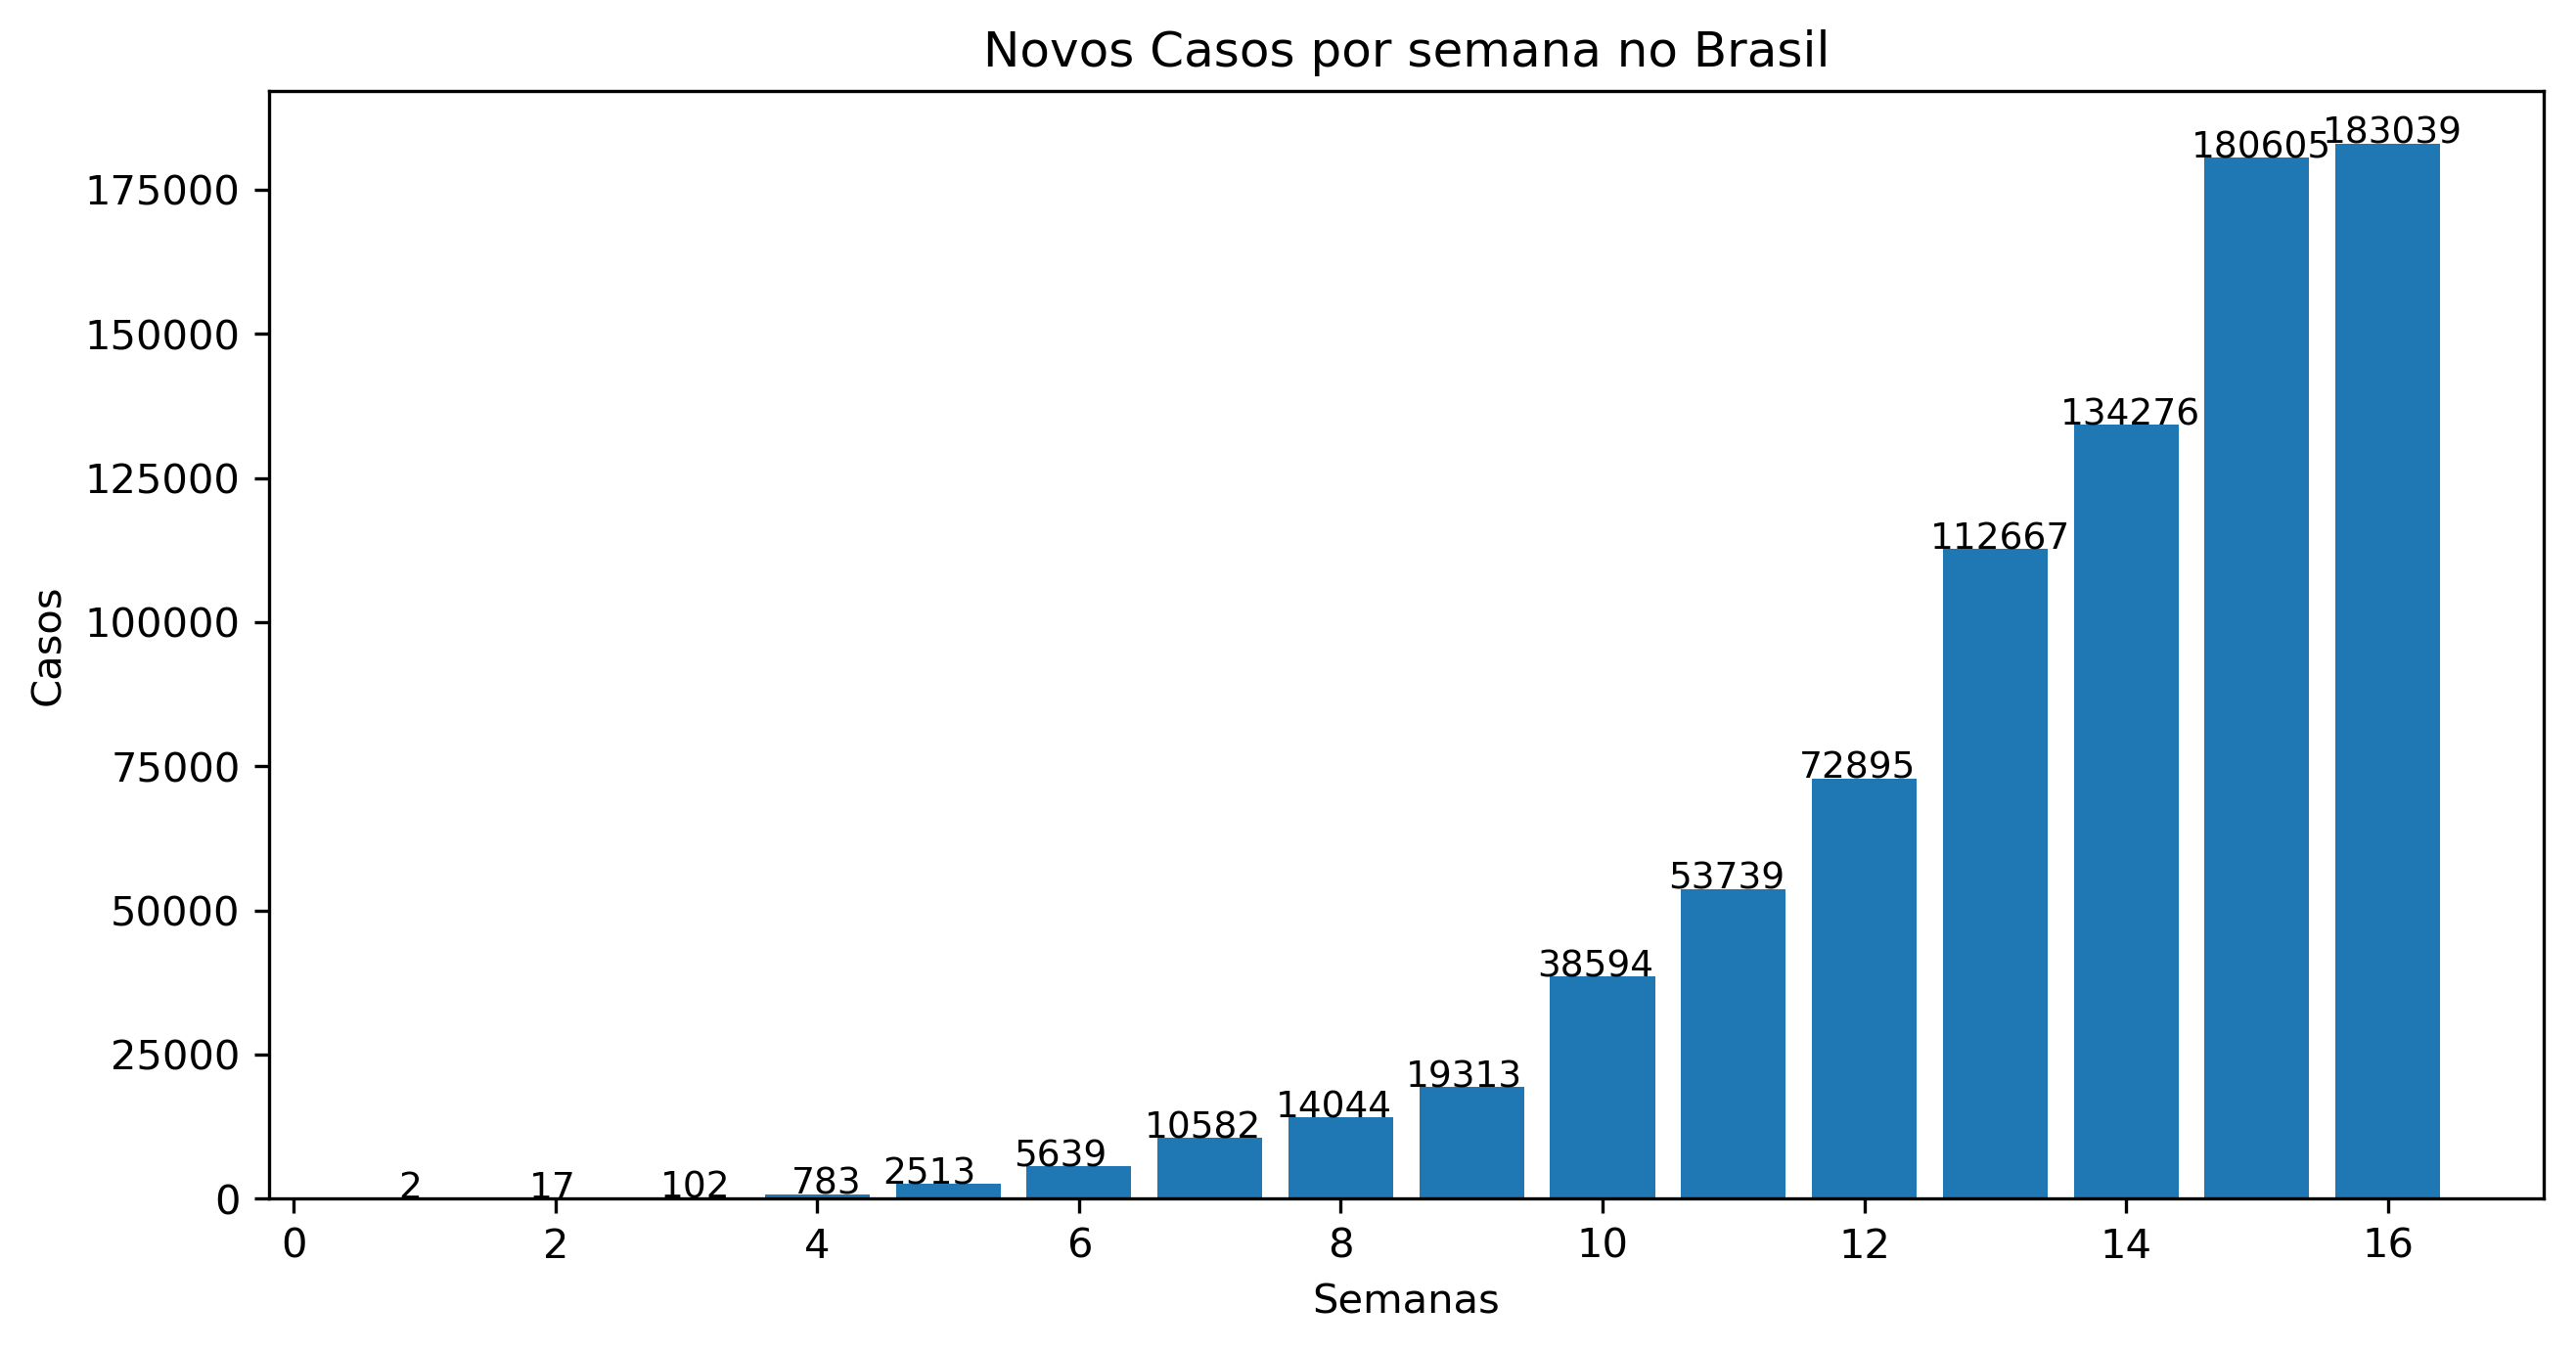

In [19]:
plot_graf(novos_cs,"Novos Casos por semana no Brasil","Semanas","Casos")

## Obitos acumulados

In [20]:
obitos_semana=[data_brasil["Cumulative_deaths"][x] for x in idx_semana]

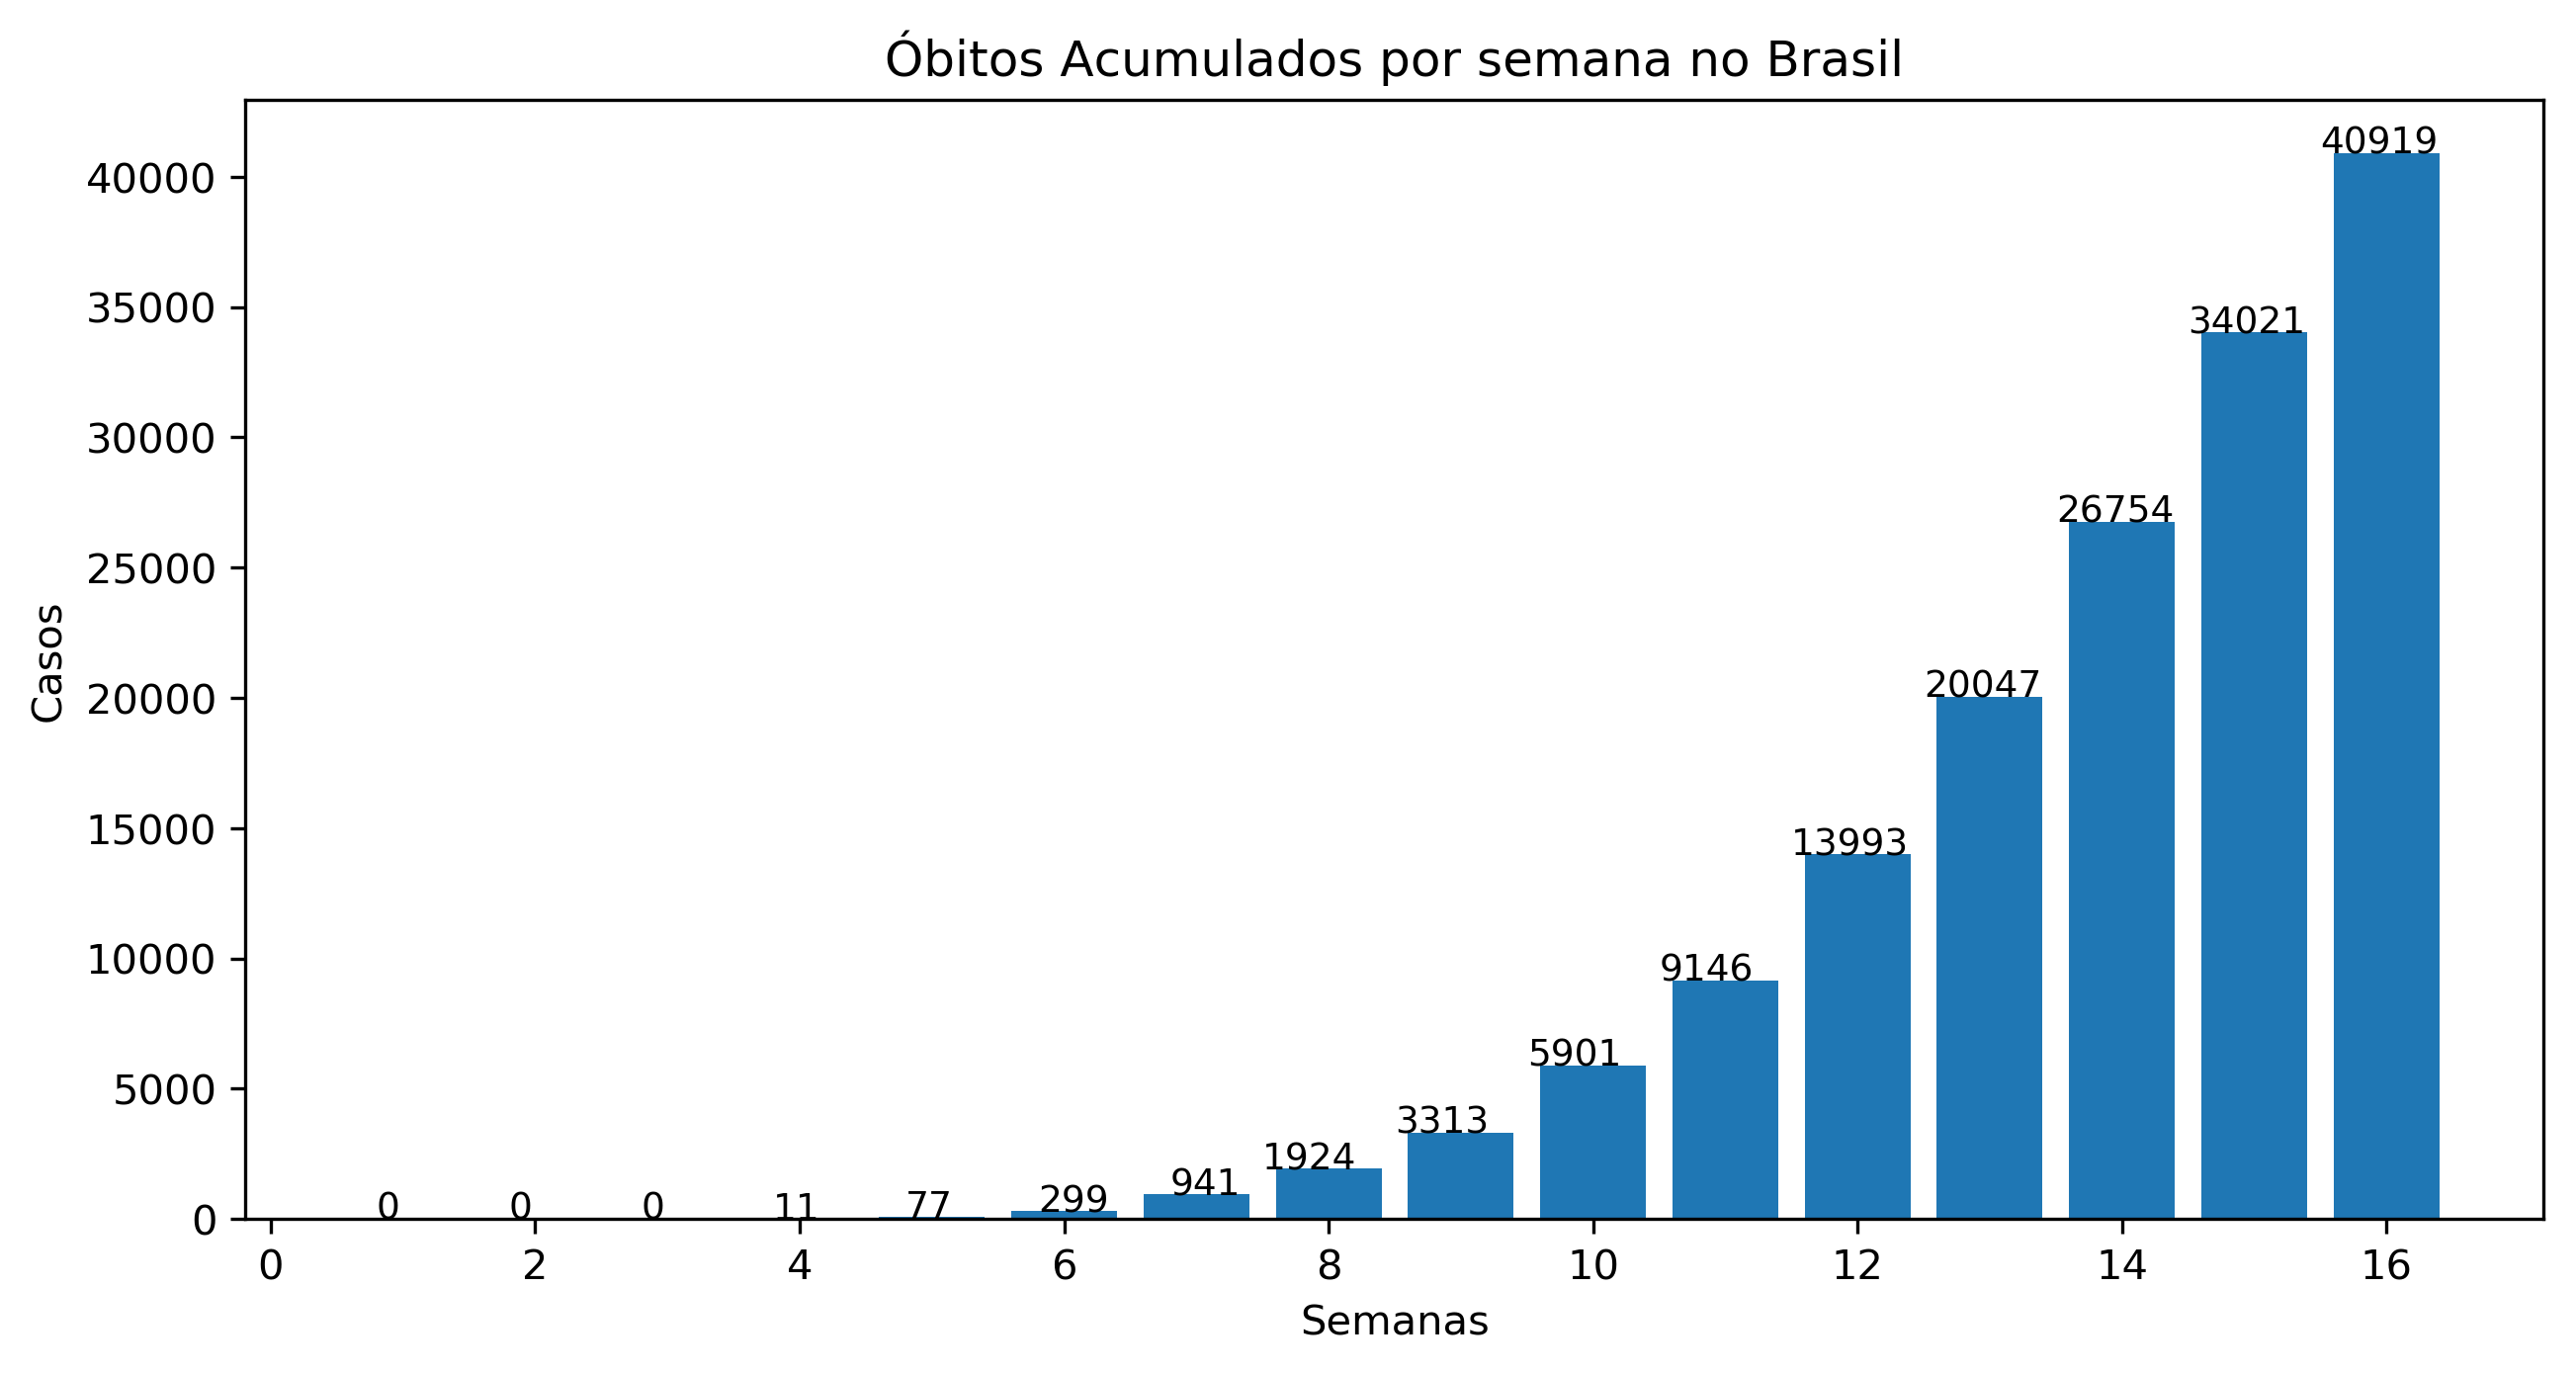

In [21]:
plot_graf(obitos_semana,"Óbitos Acumulados por semana no Brasil","Semanas","Casos")

In [22]:
#Identificando os novos óbitos por semana
novos_ob = []
novos_ob.append(obitos_semana[0])
for x in range(1,len(obitos_semana)):
    novos_ob.append(obitos_semana[x]-obitos_semana[x-1])
print(sum(novos_ob))

40919


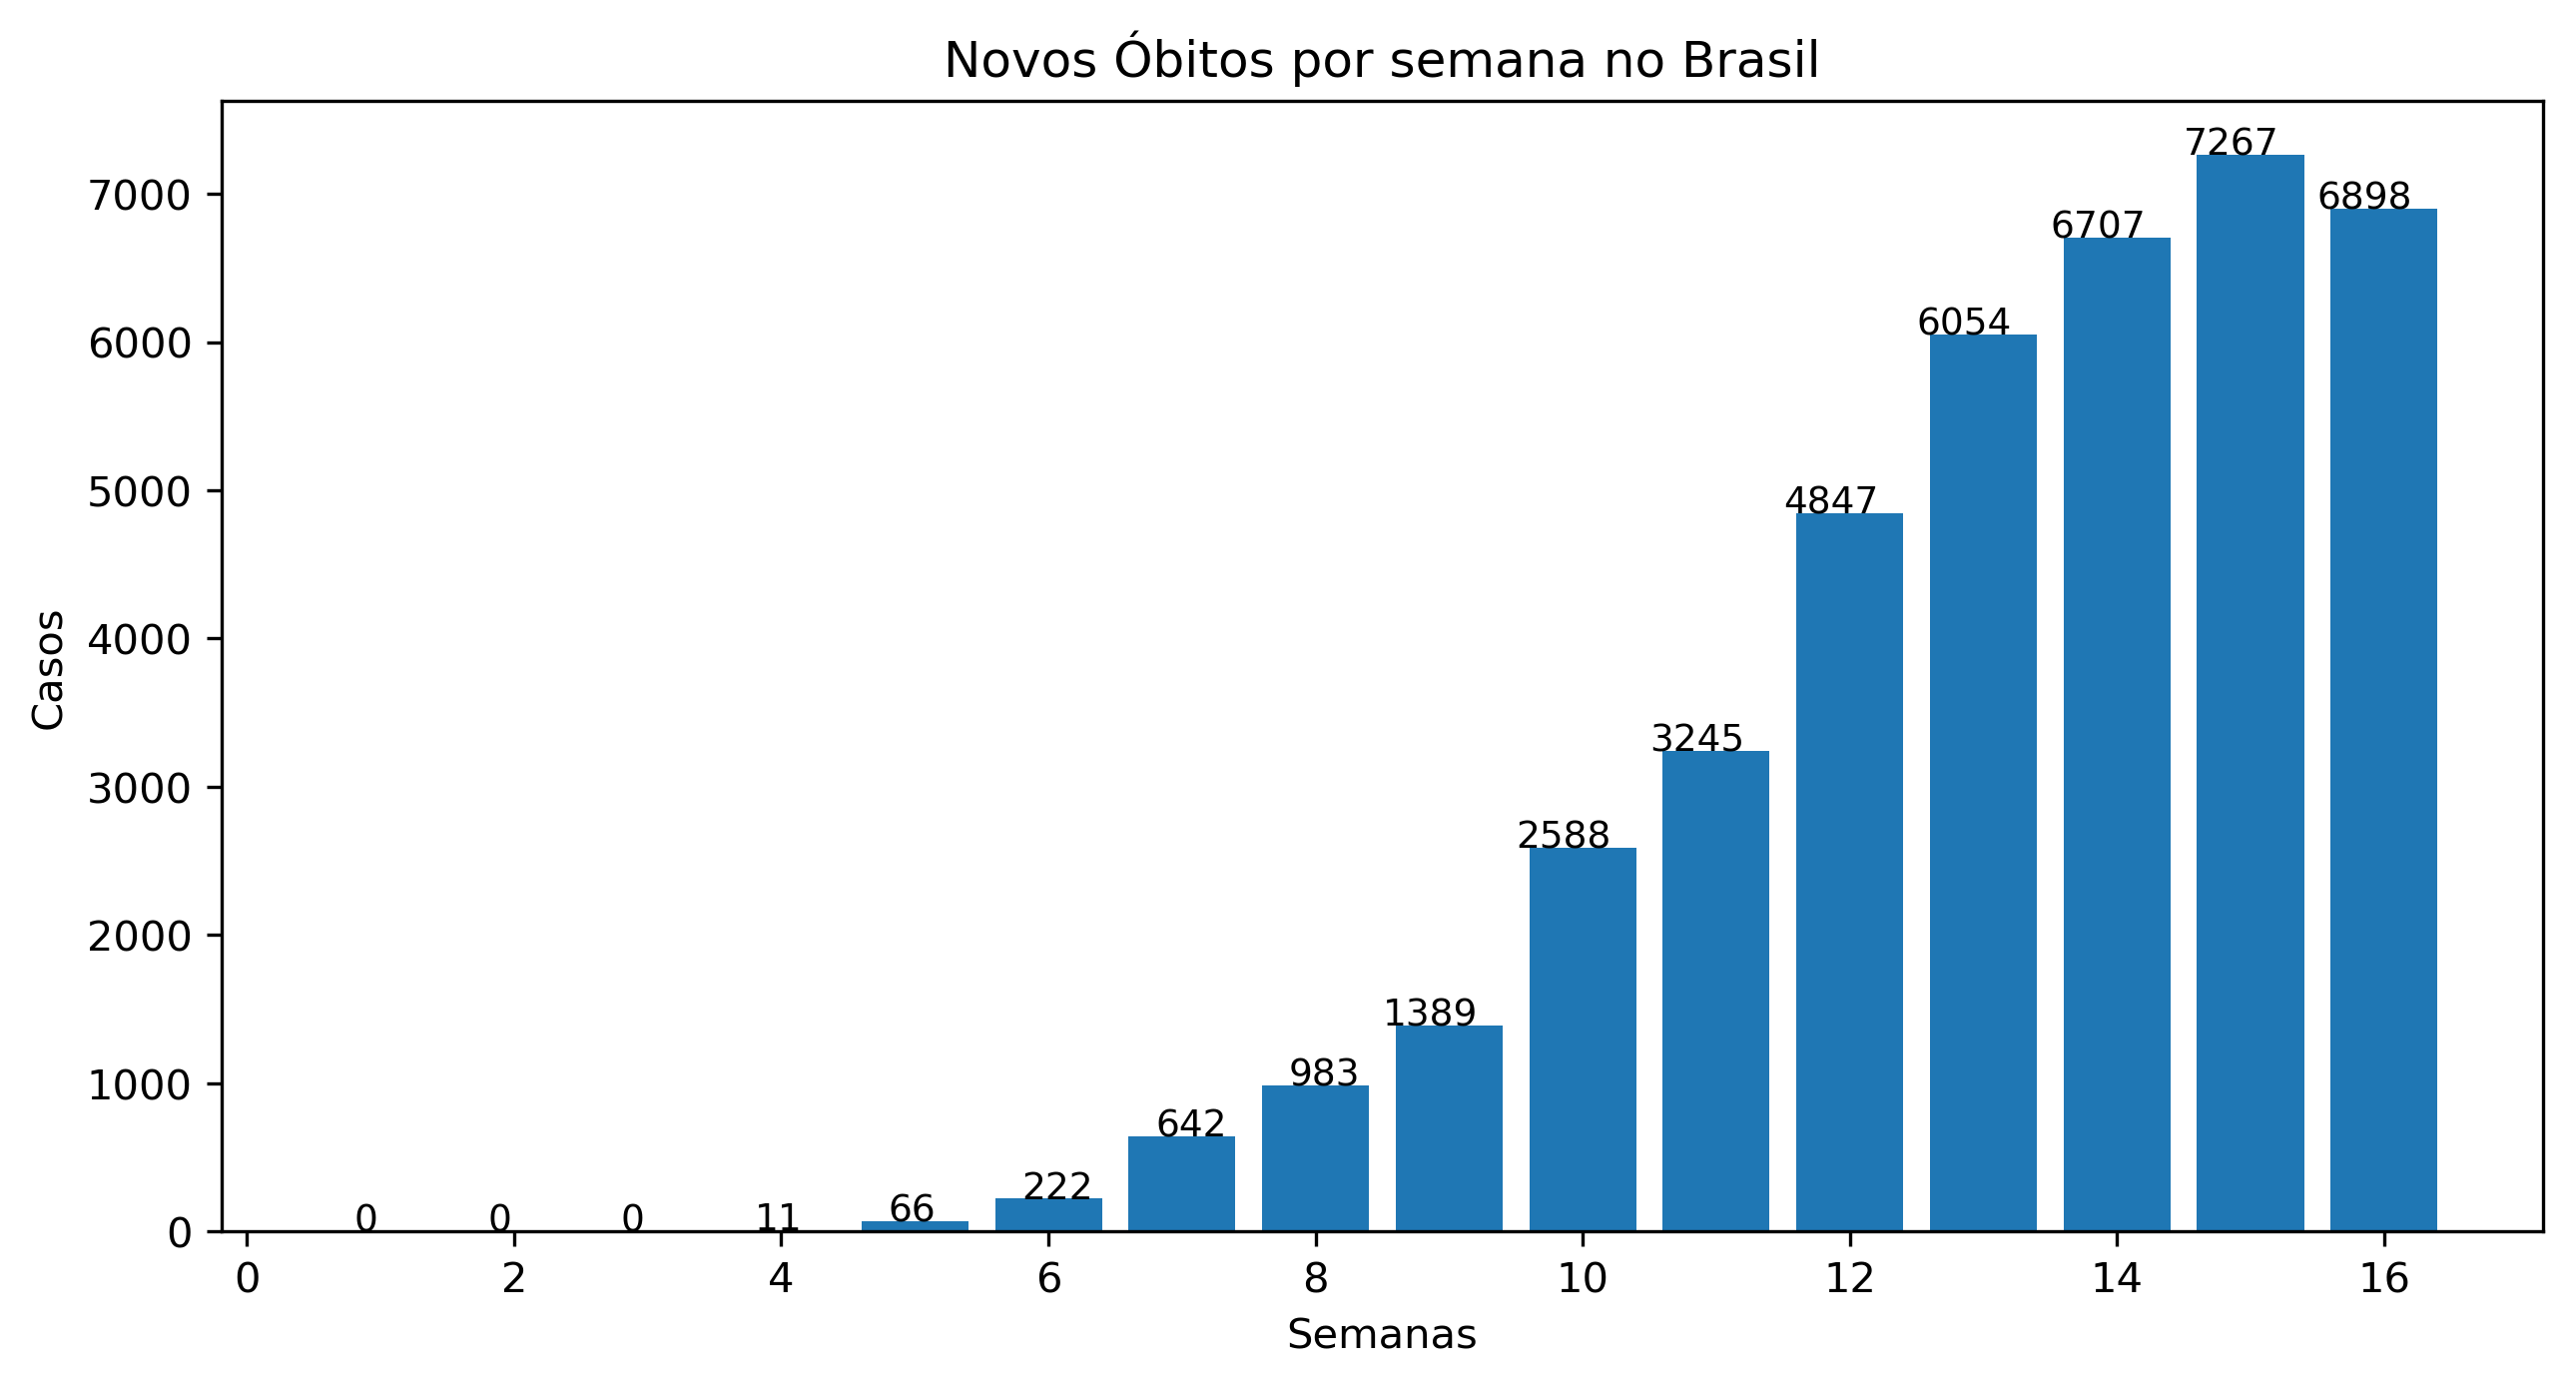

In [23]:
plot_graf(novos_ob,"Novos Óbitos por semana no Brasil","Semanas","Casos")

## Dados Municipais

In [24]:
data_muni=pd.read_excel("HIST_PAINEL_COVIDBR_14jun2020.xlsx")

In [25]:
data_muni.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN


In [26]:
data_muni.loc[data_muni["estado"]=="PB"].groupby("municipio").sum()["casosNovos"]

municipio
Aguiar                              2
Alagoa Grande                     211
Alagoa Nova                        93
Alagoinha                         203
Alcantil                            4
Alhandra                          230
Amparo                             12
Aparecida                          11
Arara                              39
Araruna                            12
Araçagi                           109
Areia                             103
Areia de Baraúnas                   1
Areial                             18
Aroeiras                           58
Assunção                           20
Bananeiras                         48
Baraúna                            70
Barra de Santa Rosa                14
Barra de Santana                   36
Barra de São Miguel                 4
Bayeux                            577
Baía da Traição                    83
Belém                             101
Belém do Brejo do Cruz              6
Bernardino Batista                  2
Bo

In [27]:
data_muni.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos'],
      dtype='object')

In [28]:
data_muni.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN


In [29]:
data_muni.loc[(data_muni["estado"]=="PB") & (data_muni["casosNovos"]!=0)].tail()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
112864,Nordeste,PB,Umbuzeiro,25,251700.0,25015.0,15ª REGIAO,2020-06-11,24,9907,18,1,1,0,NaN,NaN
112923,Nordeste,PB,Várzea,25,251710.0,25006.0,6ª REGIAO,2020-05-21,21,2810,1,1,0,0,NaN,NaN
112944,Nordeste,PB,Várzea,25,251710.0,25006.0,6ª REGIAO,2020-06-11,24,2810,2,1,0,0,NaN,NaN
113002,Nordeste,PB,Vieirópolis,25,251720.0,25010.0,10ª REGIAO,2020-05-20,21,5348,2,2,0,0,NaN,NaN
113015,Nordeste,PB,Vieirópolis,25,251720.0,25010.0,10ª REGIAO,2020-06-02,23,5348,3,1,0,0,NaN,NaN


In [30]:
data_muni[["Recuperadosnovos","emAcompanhamentoNovos","codmun"]]=data_muni[["Recuperadosnovos","emAcompanhamentoNovos","codmun"]].fillna(0).astype(int)

In [31]:
data_muni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383908 entries, 0 to 383907
Data columns (total 16 columns):
regiao                   383908 non-null object
estado                   383797 non-null object
municipio                379280 non-null object
coduf                    383908 non-null int64
codmun                   383908 non-null int32
codRegiaoSaude           379280 non-null float64
nomeRegiaoSaude          379280 non-null object
data                     383908 non-null datetime64[ns]
semanaEpi                383908 non-null int64
populacaoTCU2019         382388 non-null object
casosAcumulado           383908 non-null int64
casosNovos               383908 non-null int64
obitosAcumulado          383908 non-null int64
obitosNovos              383908 non-null int64
Recuperadosnovos         383908 non-null int32
emAcompanhamentoNovos    383908 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(3), int64(6), object(5)
memory usage: 42.5+ MB


In [32]:
data_muni.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,NaN,NaN,76,0,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,0,0
1,Brasil,NaN,NaN,76,0,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,0,0
2,Brasil,NaN,NaN,76,0,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,0,0
3,Brasil,NaN,NaN,76,0,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,0,0
4,Brasil,NaN,NaN,76,0,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,0,0


In [33]:
data_muni.groupby("semanaEpi").head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,NaN,NaN,76,0,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,0,0
1,Brasil,NaN,NaN,76,0,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,0,0
2,Brasil,NaN,NaN,76,0,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,0,0
3,Brasil,NaN,NaN,76,0,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,0,0
4,Brasil,NaN,NaN,76,0,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,0,0
5,Brasil,NaN,NaN,76,0,NaN,NaN,2020-03-01,10,210147125,2,0,0,0,0,0
6,Brasil,NaN,NaN,76,0,NaN,NaN,2020-03-02,10,210147125,2,0,0,0,0,0
7,Brasil,NaN,NaN,76,0,NaN,NaN,2020-03-03,10,210147125,2,0,0,0,0,0
8,Brasil,NaN,NaN,76,0,NaN,NaN,2020-03-04,10,210147125,3,1,0,0,0,0
9,Brasil,NaN,NaN,76,0,NaN,NaN,2020-03-05,10,210147125,7,4,0,0,0,0


In [34]:
data_rt=data_muni.loc[data_muni["estado"]=="PB"].dropna().loc[data_muni["municipio"]=="Rio Tinto"]

In [35]:
data_semana=data_muni[["casosAcumulado","casosNovos","obitosAcumulado","obitosNovos",\
         "Recuperadosnovos","emAcompanhamentoNovos","semanaEpi"]].groupby("semanaEpi").sum()

In [36]:
data_semana

,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
semanaEpi,,,,,,
9,10,4,0,0,0,0
10,96,34,0,0,0,0
11,864,204,0,0,0,0
12,7612,2014,80,36,0,0
13,40524,9462,1004,306,0,0
14,146006,19136,5482,954,0,0
15,333635,31418,16927,2083,0,0
16,600434,47665,36741,3674,0,0
17,988677,66054,65141,5026,178152,129232


AttributeError: 'numpy.ndarray' object has no attribute 'hist'

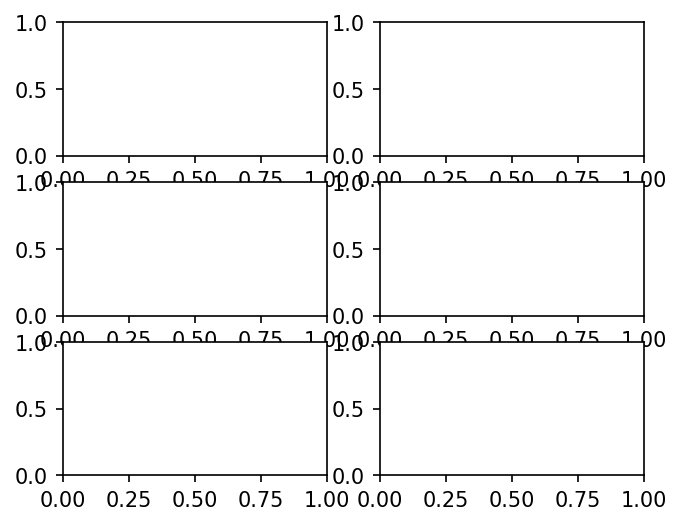

In [37]:
f, a1 = plt.subplots(3,2,dpi=150,figsize=(5,4))

a1[0].hist(data_semana[data_semana_columns[0]])
a1[0].set_title(str(data_semana_colums[0]))


plt.tight_layout()
plt.show()